# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier

# **Load Data**

In [ ]:
# Load dataset
data = pd.read_csv('alzheimers_disease_data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# **Pre-Processing**

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCo

In [ ]:
# Menghilangkan nilai yang hilang
data = data.dropna()

In [ ]:
# Menghilangkan data duplikat
data = data.drop_duplicates()
print(data.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [ ]:
# Asumsikan kolom terakhir adalah label
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = pd.get_dummies(data['Diagnosis'], drop_first=True)  # One-hot encoding jika diagnosisnya kategorikal

# **Pembagian Data**

In [ ]:
# Membagi data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **XGBoost**

In [ ]:
# Definisikan model XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# K-Fold Cross Validation
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Evaluasi model menggunakan cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [ ]:
# Latih model pada set pelatihan
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Hasil prediksi
y_pred = model.predict(X_test)

In [ ]:
# Tampilkan Classification Report dan Accuracy
print("Classification Report XGBoost")
print(classification_report(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Classification Report XGBoost
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       277
        True       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Model accuracy score: 0.9488


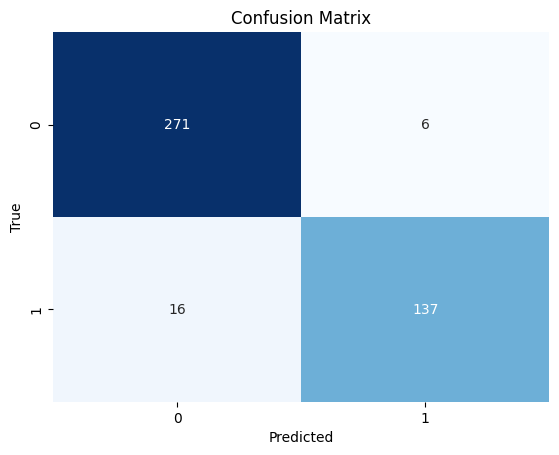

In [ ]:
# Tampilkan Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix")

# **Grid Search**

In [ ]:
# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
# Setup validasi silang K-fold dengan n_splits=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Menjalankan GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=No...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Mengambil hasil grid search
cv_results = grid_search.cv_results_

In [ ]:
# Menyusun hasil ke dalam DataFrame
results_df = pd.DataFrame({
    'parameter': cv_results['params'],
    'mean_test_score': cv_results['mean_test_score'],
    'rank_test_score': cv_results['rank_test_score']
}).sort_values(by='rank_test_score')

In [ ]:
# Menyusun hasil ke dalam DataFrame
results_df = pd.DataFrame({
    'parameter': cv_results['params'],
    'mean_test_score': cv_results['mean_test_score'],
    'rank_test_score': cv_results['rank_test_score']
}).sort_values(by='rank_test_score')

In [ ]:
# Menampilkan hasil perbandingan parameter
print("\nHasil Perbandingan Hyperparameter XGBoost:")
print(results_df)


Hasil Perbandingan Hyperparameter XGBoost:
                                             parameter  mean_test_score  \
310  {'colsample_bytree': 1.0, 'learning_rate': 0.0...         0.952298   
50   {'colsample_bytree': 0.6, 'learning_rate': 0.1...         0.951717   
182  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.951717   
312  {'colsample_bytree': 1.0, 'learning_rate': 0.0...         0.951717   
185  {'colsample_bytree': 0.8, 'learning_rate': 0.1...         0.951717   
..                                                 ...              ...   
11   {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.719580   
10   {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.718999   
2    {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.718996   
1    {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.715507   
0    {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.714926   

     rank_test_score  
310                1  
50       

In [ ]:
# Menguji model terbaik pada data testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Akurasi pada data uji
test_accuracy = best_model.score(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy:.4f}")
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Akurasi pada data uji: 0.9558
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score:  0.9522983816129471
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


Classification Report XGBoost setelah Optimasi
[[271   6]
 [ 13 140]]
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       277
        True       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Model accuracy score setelah optimasi: 0.9558


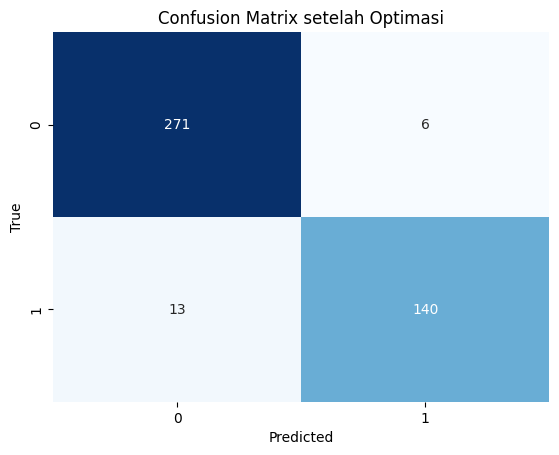

In [ ]:
# Tampilkan Confusion Matrix dan Classification Report setelah optimasi
print("Classification Report XGBoost setelah Optimasi")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Model accuracy score setelah optimasi: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix setelah Optimasi")